# Milestone 2 - Data Collection and description

## Imports

In [1]:
import pandas as pd

## Loading

Reference of dataset : http://www.fao.org/faostat/en/#data

We choose to work with two tables : 
- Crops (from production) 
- Crops and livestock products (from trades)

In [20]:
raw_crops = pd.read_csv('data/crops_production.csv',encoding = "ISO-8859-1")
raw_trade = pd.read_csv('data/crops_trades.csv',encoding = "ISO-8859-1")

In [22]:
raw_crops.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1975,1975,ha,0.0,F
1,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1976,1976,ha,5900.0,F
2,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1977,1977,ha,6000.0,F
3,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1978,1978,ha,6000.0,F
4,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1979,1979,ha,6000.0,F


In [21]:
raw_trade.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,231,Almonds shelled,5610,Import Quantity,2014,2014,tonnes,167.0,R
1,2,Afghanistan,231,Almonds shelled,5610,Import Quantity,2015,2015,tonnes,181.0,R
2,2,Afghanistan,231,Almonds shelled,5610,Import Quantity,2016,2016,tonnes,845.0,R
3,2,Afghanistan,231,Almonds shelled,5622,Import Value,2014,2014,1000 US$,1116.0,R
4,2,Afghanistan,231,Almonds shelled,5622,Import Value,2015,2015,1000 US$,1377.0,R


## Data exploration and cleaning

- Value format (flota instead of int)
- Null values

### Format
We Want to check the format of the columns (e.g. if the column represent a number, is the value really a number of a string ?).

#### Unit

### Dataframe comparison 
Before cleaning, we will keep only rows we are interested in, among the two datasets. As we want combine information from the two, we want to compare them and see how they can be combined.

#### Overview

In [72]:
raw_crops.nunique()

Area Code          258
Area               258
Item Code          180
Item               180
Element Code         3
Element              3
Year Code           57
Year                57
Unit                 3
Value           520310
Flag                 6
dtype: int64

In [73]:
raw_trade.nunique()

Area Code          253
Area               253
Item Code          471
Item               471
Element Code         4
Element              4
Year Code           56
Year                56
Unit                 2
Value           770923
Flag                 6
dtype: int64

**Conclusion:** TODO

---

#### Years

In [25]:
raw_crops_years = raw_crops.Year.unique()
raw_crops_years.sort()
raw_crops_years

array([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017])

In [28]:
raw_trade_years = raw_trade.Year.unique()
raw_trade_years.sort()
raw_trade_years

array([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016])

**Observations:** 
- the production crops dataframe have data from years 1961 until 2017
- the trade dataframe doesn't have any data for year 2017 (only until 2016)

##### Quantity of information per year
Let's see the quantity of information we have for each year.

In [74]:
import seaborn as sns

**Crops production**

In [62]:
# Compute the number of row per year
raw_crops.groupby('Year').count().head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Unit,Value,Flag
Year,,,,,,,,,,
1961,37850,37850,37850,37850,37850,37850,37850,37850,33947,31333
1962,37884,37884,37884,37884,37884,37884,37884,37884,33977,31337
1963,37882,37882,37882,37882,37882,37882,37882,37882,33975,31112
1964,37907,37907,37907,37907,37907,37907,37907,37907,34003,31036
1965,37901,37901,37901,37901,37901,37901,37901,37901,33994,30804


It seems like the count value is the same for the first columns. We keep column 'Item' as reference as intuitively it is the one which is less probable to be null (otherwise the line doesn't give any information).

In [68]:
# Compute the number of items per year
raw_crops.groupby('Year').Item.nunique().head()

Year
1961    179
1962    179
1963    179
1964    179
1965    179
Name: Item, dtype: int64

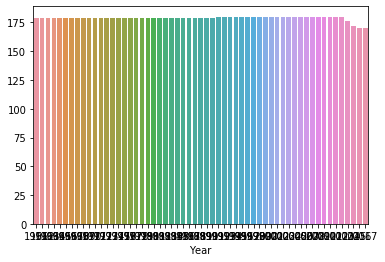

In [65]:
#TODO : make plot better
df = raw_crops.groupby('Year').Item.nunique()
sns.barplot(df.index, df.values);

**Crops trades:**

In [75]:
# Compute the number of row per year
raw_trade.groupby('Year').count().head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Unit,Value,Flag
Year,,,,,,,,,,
1961,258706,258706,258706,258706,258706,258706,258706,258706,192999,157860
1962,258706,258706,258706,258706,258706,258706,258706,258706,193001,155656
1963,258706,258706,258706,258706,258706,258706,258706,258706,193007,155044
1964,258706,258706,258706,258706,258706,258706,258706,258706,193008,154845
1965,258706,258706,258706,258706,258706,258706,258706,258706,193008,154291


In [77]:
# Compute the number of items per year
raw_trade.groupby('Year').Item.nunique().head()

Year
1961    466
1962    466
1963    466
1964    466
1965    466
Name: Item, dtype: int64

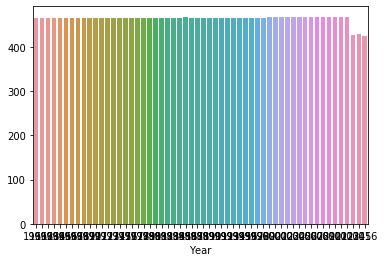

In [81]:
#TODO : make plot better
df2 = raw_trade.groupby('Year').Item.nunique()
sns.barplot(df2.index, df2.values);

The plot is quite messy. We may want to visualize the distribution by decade.

TODO : interpretation sur le fait qu'il y a énormément de lignes par item

**Conclusion:** 
- We want to have data on trades for year 2017
- We want to add a decade column

We are not applying these modifications right away, because it may be unefficient if we don't do them in the right order. The idea is to reduce the number of rows before applying the other operations.

---

#### Items

In [59]:
items_raw_crops = raw_crops.Item.value_counts()

In [60]:
items_raw_crops.describe()

count      180.000000
mean     13473.750000
std       9519.913009
min        270.000000
25%       5969.750000
50%      12042.000000
75%      19158.750000
max      38636.000000
Name: Item, dtype: float64

In [54]:
# Percentage of 
df = raw_crops.groupby('Year').Item.value_counts(normalize=True)

In [55]:
df

Year  Item                    
1961  Vegetables Primary          0.017015
      Fruit Primary               0.016724
      Roots and Tubers,Total      0.016697
      Vegetables, fresh nes       0.016592
      Oilcrops, Oil Equivalent    0.015984
                                    ...   
2017  Cassava leaves              0.000465
      Coir                        0.000377
      Kapok fruit                 0.000332
      Tallowtree seed             0.000332
      Jojoba seed                 0.000266
Name: Item, Length: 10197, dtype: float64

----

# Rest
Things I consider interesting to look at, but not analysed yet.

In [70]:
raw_crops.groupby('Year').nunique().head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
Year,,,,,,,,,,,
1961,224,224,179,179,3,3,1,1,3,18574,5
1962,224,224,179,179,3,3,1,1,3,18867,5
1963,224,224,179,179,3,3,1,1,3,19035,5
1964,224,224,179,179,3,3,1,1,3,19421,5
1965,224,224,179,179,3,3,1,1,3,19676,5


In [8]:
Raw_Crops.describe()

,Area Code,Item Code,Element Code,Year Code,Year,Value
count,2.425275e+06,2.425275e+06,2.425275e+06,2.425275e+06,2.425275e+06,2.286683e+06
mean,1.569183e+03,6.102060e+02,5.415041e+03,1.990384e+03,1.990384e+03,1.823040e+06
std,2.347083e+03,5.426334e+02,8.250871e+01,1.635972e+01,1.635972e+01,2.314048e+07
min,1.000000e+00,1.500000e+01,5.312000e+03,1.961000e+03,1.961000e+03,0.000000e+00
25%,9.000000e+01,2.360000e+02,5.312000e+03,1.976000e+03,1.976000e+03,4.700000e+03
50%,1.730000e+02,4.460000e+02,5.419000e+03,1.992000e+03,1.992000e+03,2.800000e+04
75%,5.101000e+03,6.610000e+02,5.510000e+03,2.005000e+03,2.005000e+03,1.424285e+05
max,5.817000e+03,1.841000e+03,5.510000e+03,2.017000e+03,2.017000e+03,2.980175e+09


In [12]:
crops_items = Raw_Crops.Item.unique()

In [13]:
len(crops_items)

180

In [18]:
trade_items = Raw_Trade.Item.unique()

In [19]:
len(trade_items)

471

In [18]:
#Remove items not in crops
traded_crops_raw = Raw_Trade.loc[Raw_Trade['Item'].isin(crops_items)]

In [19]:
len(traded_crops_raw.Item.unique())

121

In [20]:
traded_crops_raw.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
118,2,Afghanistan,711,"Anise, badian, fennel, coriander",5610,Import Quantity,2014,2014,tonnes,284.0,R
119,2,Afghanistan,711,"Anise, badian, fennel, coriander",5610,Import Quantity,2015,2015,tonnes,1000.0,R
120,2,Afghanistan,711,"Anise, badian, fennel, coriander",5610,Import Quantity,2016,2016,tonnes,815.0,R
121,2,Afghanistan,711,"Anise, badian, fennel, coriander",5622,Import Value,2014,2014,1000 US$,599.0,R
122,2,Afghanistan,711,"Anise, badian, fennel, coriander",5622,Import Value,2015,2015,1000 US$,2041.0,R


**Raw Trade 2017**

In [15]:
Raw_Trade_2017 = pd.read_csv('data/crops_trades_2017.csv')

In [16]:
len(Raw_Trade_2017.Item.unique())

372

In [17]:
traded_crops_2017 = Raw_Trade_2017.loc[Raw_Trade_2017['Item'].isin(crops_items)]

In [76]:
len(traded_crops_2017.Item.unique())

118

In [77]:
traded_crops_2017_2 = Raw_Trade_2017.loc[Raw_Trade_2017['Item'].isin(traded_crops.Item.unique())]

In [78]:
len(traded_crops_2017_2.Item.unique())

111

In [81]:
set(traded_crops_2017.Item.unique())-set(traded_crops_2017_2.Item.unique())

{'Almonds, with shell',
 'Areca nuts',
 'Coir',
 'Fibre crops nes',
 'Hazelnuts, with shell',
 'Karite nuts (sheanuts)',
 'Quinoa'}

In [82]:
set(traded_crops_2017_2.Item.unique())-set(traded_crops_2017.Item.unique())

set()

**Concat**

In [22]:
#TODO : check if we merge traded_crops_2017 or traded_crops_2017_2
traded_crops = pd.concat([traded_crops_raw,traded_crops_2017],axis=0,ignore_index=True, sort=False)

In [25]:
traded_crops.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Domain Code,Domain,Flag Description
0,2,Afghanistan,711,"Anise, badian, fennel, coriander",5610,Import Quantity,2014,2014,tonnes,284.0,R,NaN,NaN,NaN
1,2,Afghanistan,711,"Anise, badian, fennel, coriander",5610,Import Quantity,2015,2015,tonnes,1000.0,R,NaN,NaN,NaN
2,2,Afghanistan,711,"Anise, badian, fennel, coriander",5610,Import Quantity,2016,2016,tonnes,815.0,R,NaN,NaN,NaN
3,2,Afghanistan,711,"Anise, badian, fennel, coriander",5622,Import Value,2014,2014,1000 US$,599.0,R,NaN,NaN,NaN
4,2,Afghanistan,711,"Anise, badian, fennel, coriander",5622,Import Value,2015,2015,1000 US$,2041.0,R,NaN,NaN,NaN


TODO : 

- Check that we don't have teo times the same lines for one food, for example estimated values and official values 
- Check nan
- Check stats on quantity / values >> see if we keep only one of the two

In [26]:
df_Avocados = Raw_Crops[Raw_Crops.Item == 'Avocados']
df_Avocados


,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
48007,9,Argentina,572,Avocados,5312,Area harvested,1961,1961,ha,NaN,M
48008,9,Argentina,572,Avocados,5312,Area harvested,1962,1962,ha,NaN,M
48009,9,Argentina,572,Avocados,5312,Area harvested,1963,1963,ha,NaN,M
48010,9,Argentina,572,Avocados,5312,Area harvested,1964,1964,ha,NaN,M
48011,9,Argentina,572,Avocados,5312,Area harvested,1965,1965,ha,NaN,M
...,...,...,...,...,...,...,...,...,...,...,...
2399702,5817,Net Food Importing Developing Countries,572,Avocados,5510,Production,2013,2013,tonnes,1367948.0,A
2399703,5817,Net Food Importing Developing Countries,572,Avocados,5510,Production,2014,2014,tonnes,1660381.0,A
2399704,5817,Net Food Importing Developing Countries,572,Avocados,5510,Production,2015,2015,tonnes,1641125.0,A
2399705,5817,Net Food Importing Developing Countries,572,Avocados,5510,Production,2016,2016,tonnes,1842254.0,A


In [27]:
df_Avocados_production = df_Avocados[df_Avocados.Element == 'Production']
df_Avocados_production
#df_Avocados_production[df_Avocados_production.Area == 'Peru']

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
48097,9,Argentina,572,Avocados,5510,Production,1961,1961,tonnes,2000.0,NaN
48098,9,Argentina,572,Avocados,5510,Production,1962,1962,tonnes,3000.0,NaN
48099,9,Argentina,572,Avocados,5510,Production,1963,1963,tonnes,2900.0,NaN
48100,9,Argentina,572,Avocados,5510,Production,1964,1964,tonnes,3030.0,NaN
48101,9,Argentina,572,Avocados,5510,Production,1965,1965,tonnes,3520.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2399702,5817,Net Food Importing Developing Countries,572,Avocados,5510,Production,2013,2013,tonnes,1367948.0,A
2399703,5817,Net Food Importing Developing Countries,572,Avocados,5510,Production,2014,2014,tonnes,1660381.0,A
2399704,5817,Net Food Importing Developing Countries,572,Avocados,5510,Production,2015,2015,tonnes,1641125.0,A
2399705,5817,Net Food Importing Developing Countries,572,Avocados,5510,Production,2016,2016,tonnes,1842254.0,A


In [28]:
#Null values cleaning, elements that are the most and the least imported
Raw_Crops.drop('Flag',axis=1).isnull().sum()

Area Code            0
Area                 0
Item Code            0
Item                 0
Element Code         0
Element              0
Year Code            0
Year                 0
Unit                 0
Value           138592
dtype: int64

In [29]:
sum(Raw_Crops[Raw_Crops.drop('Flag',axis=1).Value.isnull()].Element =='Production')


61665

In [30]:
sum(Raw_Crops[Raw_Crops.drop('Flag',axis=1).Value.isnull()].Element =='Area harvested')


76927

### Statistics on the data

- Format
- Distribution
- Missing values

### Our plan

- update of plan based on above data acquaintance
- discuss how your data suits your project needs
- discuss the methods you’re going to use, giving their essential mathematical details in the notebook

### Conclusion

- show our plan for analysis and communication is now reasonable and sound
- discussing alternatives to our choice and say alternatives that we considered but dropped